In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Importing raw data and converting it to DataFrame for Future use. 

In [2]:
url="http://bit.ly/w-data"
std_data=pd.read_csv(url)
print("Data imported successfully")
std_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print(std_data.shape)

(25, 2)


### Visualizing data to understand the relationship between data features and data labels.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


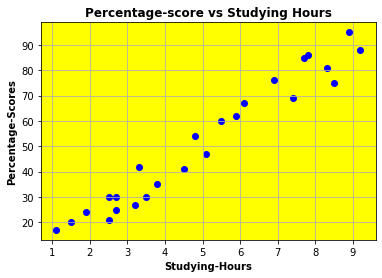

In [4]:
plt.scatter(std_data['Hours'],std_data['Scores'],color='b')
plt.plot()
plt.title("Percentage-score vs Studying Hours",fontweight='bold')
plt.xlabel("Studying-Hours",fontweight='bold')
plt.ylabel("Percentage-Scores",fontweight='bold')
ax = plt.axes()
ax.set_facecolor("yellow")
plt.grid()
plt.show()

As we can see in the graph that if number of studying hours increases then the score will also increase.

In [20]:
X=std_data.iloc[:,:-1].values
Y=std_data.iloc[:,1].values
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.15,random_state=100)#Dividing data into train and test data.

## Creating a Linear Regression model for Predicting scores on the basis of No. of studying hours.

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


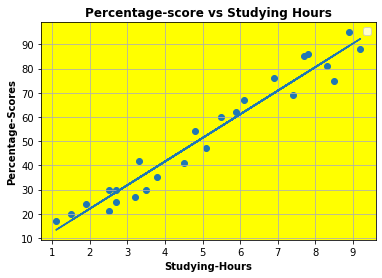

In [46]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.title("Percentage-score vs Studying Hours",fontweight='bold')
plt.xlabel("Studying-Hours",fontweight='bold')
plt.ylabel("Percentage-Scores",fontweight='bold')
plt.legend()
ax = plt.axes()
ax.set_facecolor("yellow")
plt.grid()
plt.plot(X, line);
plt.show()

## Prediction

In [50]:
Y_pred=model.predict(X_test)
print(type(X_test))
print(type(Y_pred))
print(Y_pred)
print("****************************")
print(Y_test)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[28.91576423 39.64063845 34.76569563 60.11539833]
****************************
[25 35 42 62]


In [48]:
# Comparing Actual vs Predicted percentage score
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,25,28.915764
1,35,39.640638
2,42,34.765696
3,62,60.115398


In [52]:
inp_hours=9.25
predicted_score=model.predict([[inp_hours]])
predicted_score=round(float(predicted_score),2)
print("Studying hours=",inp_hours)
print("Percentage Score=",predicted_score)


Studying hours= 9.25
Percentage Score= 92.78


##Evaluating Model

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.418827183329744
